In [1]:

####################################################################################################
####################################################################################################

import sys
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display


In [2]:

####################################################################################################
####################################################################################################

file_all = "../pax_waveform_simulator/merged/merged_all.pkl"
df_all   = pd.read_pickle(file_all)
df_all   = df_all[df_all['s2_exists'] == True]


In [3]:

####################################################################################################
####################################################################################################

arr_x_true = df_all[:]['x'].as_matrix()
arr_y_true = df_all[:]['y'].as_matrix()
arr_x_reco = df_all[:]['s2_x'].as_matrix()
arr_y_reco = df_all[:]['s2_y'].as_matrix()
arr_dx     = arr_x_true - arr_x_reco
arr_dy     = arr_y_true - arr_y_reco

print(arr_x_true.shape)
print(arr_x_reco.shape)


(24858,)
(24858,)


In [10]:

####################################################################################################
####################################################################################################

xmin_true = np.amin(arr_x_true)
xmin_reco = np.amin(arr_x_reco)
xmax_true = np.amax(arr_x_true)
xmax_reco = np.amax(arr_x_reco)
xmin_dx   = np.amin(arr_x_true)
xmax_dx   = np.amax(arr_x_reco)

print("xmin_true: " + str(xmin_true))
print("xmin_reco: " + str(xmin_reco))
print("xmax_true: " + str(xmax_true))
print("xmax_reco: " + str(xmax_reco))
print("xmin_dc:   " + str(xmin_dx))
print("xmax_dc:   " + str(xmax_dx))

xy_min     = -45
xy_max     =  45
xy_nbins   = 90

dxy_min   = -6
dxy_max   =  6
dxy_nbins = 12*10

eps   = .001

#
dx_mean = np.mean(arr_dx)
dx_std  = np.std(arr_dx)
dy_mean = np.mean(arr_dy)
dy_std  = np.std(arr_dy)

arr_dx_ovflw = arr_dx.copy()
arr_dx_ovflw[arr_dx_ovflw < dxy_min] = dxy_min + eps
arr_dx_ovflw[arr_dx_ovflw > dxy_max] = dxy_max - eps

arr_dy_ovflw = arr_dy.copy()
arr_dy_ovflw[arr_dy_ovflw < dxy_min] = dxy_min + eps
arr_dy_ovflw[arr_dy_ovflw > dxy_max] = dxy_max - eps

x_true_mean = np.mean(arr_x_true)
x_true_std  = np.std(arr_x_true)
x_reco_mean = np.mean(arr_x_reco)
x_reco_std  = np.std(arr_x_reco)

y_true_mean = np.mean(arr_y_true)
y_true_std  = np.std (arr_y_true)
y_reco_mean = np.mean(arr_y_reco)
y_reco_std  = np.std (arr_y_reco)



xmin_true: -40.642893666
xmin_reco: -40.6097832475
xmax_true: 40.4351986339
xmax_reco: 39.4964289048
xmin_dc:   -40.642893666
xmax_dc:   39.4964289048


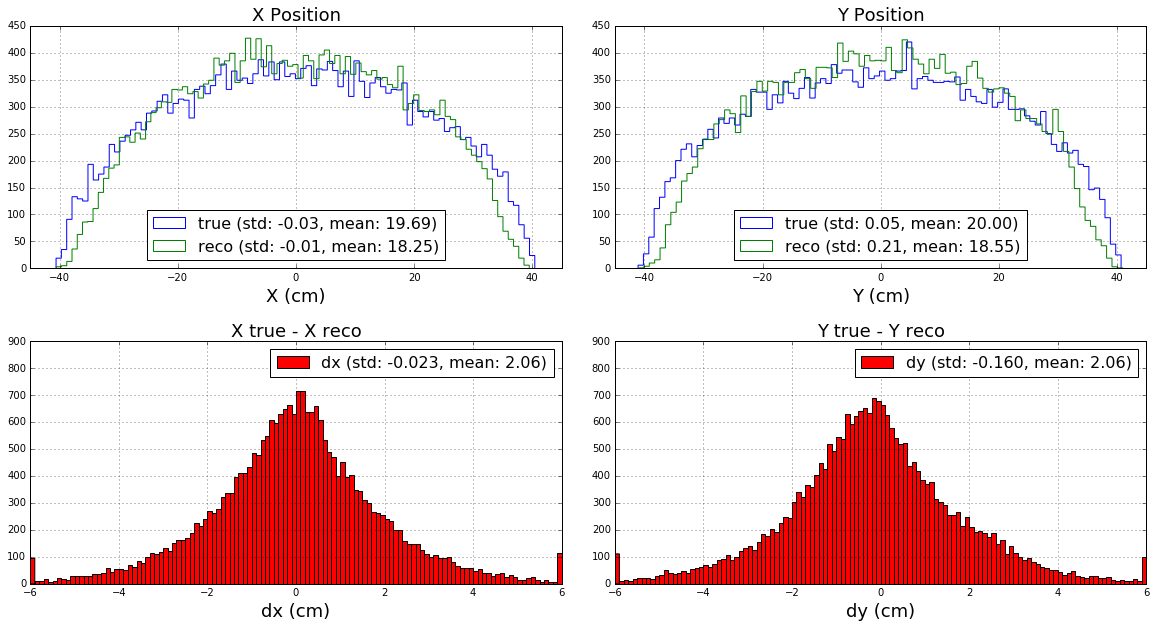

In [25]:


####################################################################################################
####################################################################################################

rows = 2
cols = 2

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)

x_label_true = 'true (std: %.02f, mean: %.02f)'% (x_true_mean, x_true_std)
x_label_reco = 'reco (std: %.02f, mean: %.02f)'% (x_reco_mean, x_reco_std)
y_label_true = 'true (std: %.02f, mean: %.02f)'% (y_true_mean, y_true_std)
y_label_reco = 'reco (std: %.02f, mean: %.02f)'% (y_reco_mean, y_reco_std)
x_label_true = 'true (std: %.02f, mean: %.02f)'% (x_true_mean, x_true_std)
x_label_reco = 'reco (std: %.02f, mean: %.02f)'% (x_reco_mean, x_reco_std)

dx_label = 'dx (std: %.03f, mean: %.02f)'% (dx_mean, dx_std)
dy_label = 'dy (std: %.03f, mean: %.02f)'% (dy_mean, dy_std)


####################################################################################################
####################################################################################################

plt.subplot(rows, cols, 1)
plt.hist(arr_x_true, bins=xy_nbins, label=x_label_true, fill=False, histtype='step')
plt.hist(arr_x_reco, bins=xy_nbins, label=x_label_reco, fill=False, histtype='step')
plt.xlim([xy_min, xy_max])
plt.xlabel('X (cm)', fontsize=18)
plt.title('X Position', fontsize=18)
plt.legend(loc='lower center', fontsize=16)
plt.grid(True)


####################################################################################################
####################################################################################################

plt.subplot(rows, cols, 2)
plt.hist(arr_y_true, bins=xy_nbins, label=y_label_true, fill=False, histtype='step')
plt.hist(arr_y_reco, bins=xy_nbins, label=y_label_reco, fill=False, histtype='step')
plt.xlim([xy_min, xy_max])
plt.xlabel('Y (cm)', fontsize=18)
plt.title('Y Position', fontsize=18)
plt.legend(loc='lower center', fontsize=16)
plt.grid(True)


####################################################################################################
####################################################################################################

plt.subplot(rows, cols, 3)
plt.hist(arr_dx_ovflw, bins=dxy_nbins, label=dx_label, fill=True, histtype='bar', color='r')
plt.xlim([dxy_min, dxy_max])
plt.ylim([0, 900])
plt.xlabel('dx (cm)', fontsize=18)
plt.title('X true - X reco', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)


####################################################################################################
####################################################################################################

plt.subplot(rows, cols, 4)
plt.hist(arr_dy_ovflw, bins=dxy_nbins, label=dy_label, fill=True, histtype='bar', color='r')
plt.xlim([dxy_min, dxy_max])
plt.ylim([0, 900])
plt.xlabel('dy (cm)', fontsize=18)
plt.title('Y true - Y reco', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)

